Recognising Handwritten Digits on MNIST Dataset using KNN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/train.csv')
print(df.shape)
df.head()

(2865, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = df.values
print(type(data))

<class 'numpy.ndarray'>


In [ ]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [ ]:
x = data[:, 1:]
y = data[:, 0]
print(x.shape , y.shape)
print(x)
print(y)

(2865, 784) (2865,)
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... nan nan nan]]
[1. 0. 1. ... 6. 8. 7.]


In [ ]:
#train test split
split = int(0.8 * x.shape[0])
split

2292

In [ ]:
x_train = x[:split, :]
y_train = y[:split]

x_test = x[split:, :]
y_test = y[split:]



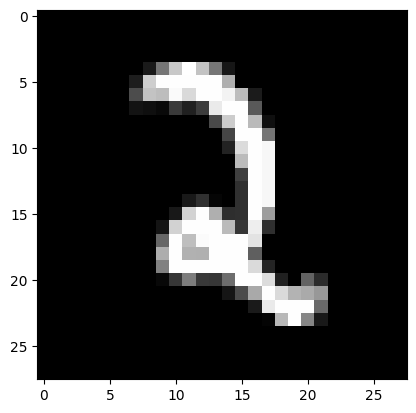

2.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/train.csv')
# print(df.shape)
df.head()

x = data[:, 1:]
y = data[:, 0]

#train test split
split = int(0.8 * x.shape[0])
split

x_train = x[:split, :]
y_train = y[:split]

x_test = x[split:, :]
y_test = y[split:]

# Visulaization some examples
def drawImage(sample):

  #reshape that image
  img = sample.reshape((28,28))
  plt.imshow(img, cmap='gray')
  plt.show()


#distance formula between 2 numpy array
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

# Test Time
def knn(X,Y,queryPoint,k=5):

    vals = []
    m = X.shape[0]

    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i])) # add in values array


    vals = sorted(vals) #soring array 2nd step
    # Nearest/First K points
    vals = vals[:k] #i want till k
    #majority voting
    vals = np.array(vals)

    #print(vals)

    new_vals = np.unique(vals[:,1],return_counts=True)
    # print(new_vals)

    index = new_vals[1].argmax()
    pred = new_vals[0][index]

    return pred


     # make predictions over test images
knn(x_train , y_train,x_test[1])

drawImage(x_test[25])

print(y_test[25])